<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Titanic-Dataset" data-toc-modified-id="Titanic-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Titanic Dataset</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#Survived-Target" data-toc-modified-id="Survived-Target-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Survived Target</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing</a></span></li></ul></div>

# Titanic Dataset

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

**Data size :** 891 observations and 11 features

Name | Definition | Key
:---|:---|:---
survived	| Survival	| 0 = No, 1 = Yes
pclass	| Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd
sex| 	Sex	| 
Age	| Age in years	| 
sibsp	| # of siblings / spouses aboard the Titanic	| 
parch	| # of parents / children aboard the Titanic	| 
ticket	| Ticket number	| 
fare	| Passenger fare	| 
cabin	| Cabin number	| 
embarked	| Port of Embarkation	| C = Cherbourg, Q = Queenstown, S = Southampton

**Reference**
- [Kaggle Competiton : Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview/description)

In [35]:
import sys
sys.path.append('../code')

from loaddata import TitanicData
import matplotlib.pyplot as plt

# Load Data

In [5]:
titanic_dataset = TitanicData(file_path='../dataset/titanic/')

In [13]:
train_shape = titanic_dataset.data.shape
test_shape = titanic_dataset.testset.shape
print(f'Train set: {train_shape[0]} observations and {train_shape[1]} features')
print(f'Test set: {test_shape[0]} observations and {test_shape[1]} features')

Train set: 891 observations and 12 features
Test set: 418 observations and 11 features


In [6]:
titanic_dataset.data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Survived Target 

A `Survived` feature shows that a passanger survived or not

- 0: No
- 1: Yes

In [36]:
survived_cnt = titanic_dataset.data.Survived.value_counts()

In [37]:
survived_cnt

0    549
1    342
Name: Survived, dtype: int64

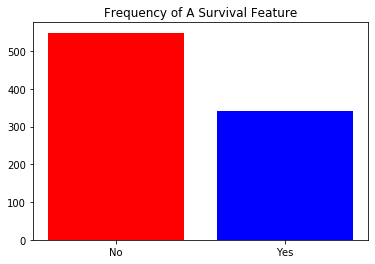

In [49]:
plt.bar(['No','Yes'],survived_cnt, color=['r','b'])
plt.title('Frequency of A Survival Feature')
plt.show()

# Preprocessing

I processed train and test set in five steps. This process applied in both the train and the test set.

1. Label encoding about a `Sex` feature.
2. Implementing missing values with median or mode.
3. Discard unused features
4. Make a `Title` feature from a `Name` feature
5. Dummy transformation to categorical feature.

If you want to see this processing code, you can see in my github [code/loaddata.py](https://github.com/TooTouch/WhiteBox-Part2/blob/master/code/loaddata.py).

In [21]:
train, test = titanic_dataset.transform()
x_train, y_train = train

In [24]:
pretrain_shape = x_train.shape
pretest_shape = test.shape
print(f'pre-Train set: {train_shape[0]} observations and {train_shape[1]} features')
print(f'pre-Test set: {test_shape[0]} observations and {test_shape[1]} features')

pre-Train set: 891 observations and 12 features
pre-Test set: 418 observations and 11 features
